In [157]:
# default_exp hough

# hough

> API details.

In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
#export
from chessocr.preprocess import *
from chessocr import preprocess
from fastai.data.all import *
from random import choice
URLs.chess_small

'https://chess-screenshots.s3.amazonaws.com/chess-small.tgz'

In [161]:
path = untar_data(URLs.chess_small)

## Problem images
* 100 - edge contours

In [205]:
#export
class Hough:
    """ takes a contoured image and calculates the horizontal and vertical lines based on the hough transform """
    
    def __init__(self, img):
        """ img must be binarized image of contours """
        assert is_bw(img), "Image must be binarized"
        self.img = img
        self.a = np.array(self.img)
        
    @property
    def hsig(self):
        """ signal for horizontal lines"""
        return self._sig(1)

    @property
    def vsig(self):
        """ signal for vertical lines"""
        return self._sig(0)
    
    def _sig(self, axis):
        return self.a.sum(axis=axis)[2:-2] - self.a.sum(axis=axis)[2:-2].mean()

    @property
    def vpeaks(self):
        return find_peaks(self.vsig, distance=10, height=10000)[0]

    @property
    def hpeaks(self):
        return find_peaks(self.hsig, distance=10, height=40000)[0]

    def _repr_png_(self):
        fig = plt.figure(figsize=(12, 4))
        gs = fig.add_gridspec(1, 3)
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(self.hsig)
        ax1.set_title(f'horizontal: {len(self.hpeaks)}')
        ax1.vlines(self.hpeaks, 0, 1, transform=ax1.get_xaxis_transform(), colors='r')
        ax1.set_xticks(self.hpeaks)
        ax1.set_xticklabels(self.hpeaks)

        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(self.vsig)
        ax2.set_title(f'vertical: {len(self.vpeaks)}')
        ax2.vlines(self.vpeaks, 0, 1, transform=ax2.get_xaxis_transform(), colors='r')
        ax2.set_xticks(self.vpeaks)
        ax2.set_xticklabels(self.vpeaks)
        
        ax3 = fig.add_subplot(gs[0, 2])
        ax3.imshow(self.img, cmap='gray')
        ax3.hlines(self.hpeaks+4, 0, 1, transform=ax3.get_yaxis_transform(), colors='r')
        ax3.vlines(self.vpeaks+4, 0, 1, transform=ax3.get_xaxis_transform(), colors='r')
        
        data = print_figure(fig)
        plt.close(fig)
        return data

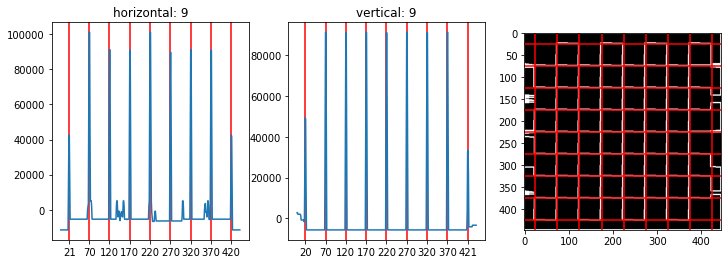

In [206]:
random.seed(43)
imgs = get_image_files(path)
img = Image.open(choice(imgs))
c = preprocess.color_to_contours(img)
h = Hough(c)
h

## FFT

In [283]:
from scipy.fft import fft, fftfreq

In [294]:
p=50
phase=21.5

In [295]:
1/50

0.02

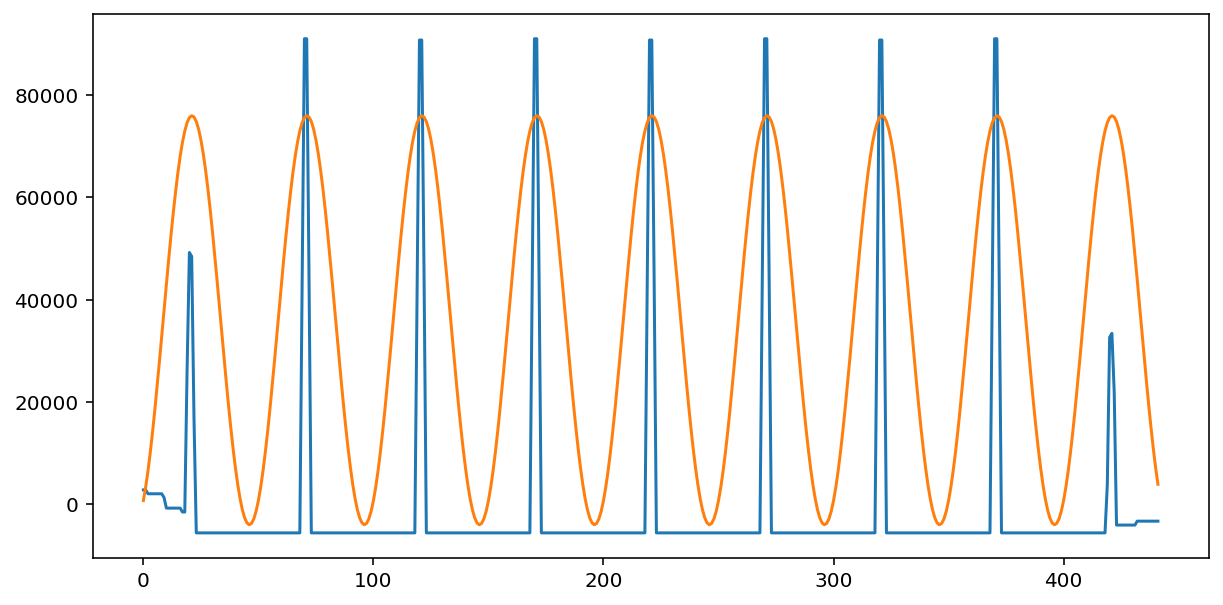

In [296]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.plot(h.vsig)
x = np.arange(len(h.vsig))
y = 40000* np.cos(x/p*2*np.pi-phase) + 36000
ax.plot(y)

In [287]:
0.02*2*np.pi

0.12566370614359174

In [270]:
yf = fft(h.vsig)
xf = fftfreq(len(h.vsig))
N = len(yf)//2

In [216]:
np.imag??

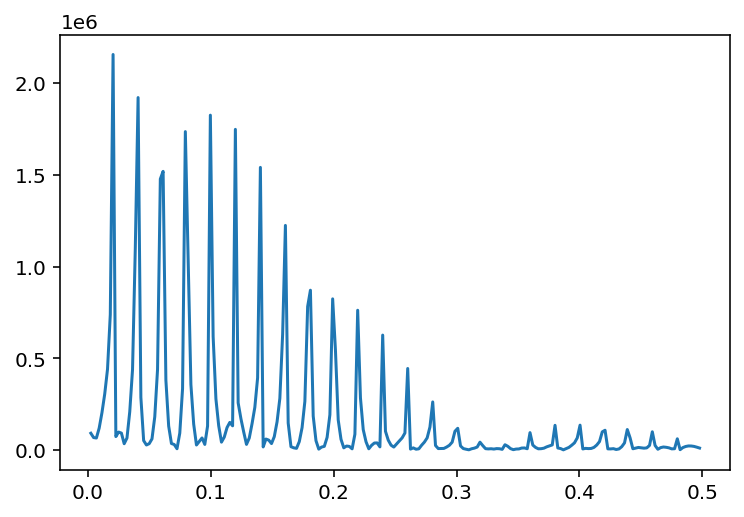

In [273]:
N = len(yf)//2
plt.plot(xf[1:N], np.abs(yf[1:N]))

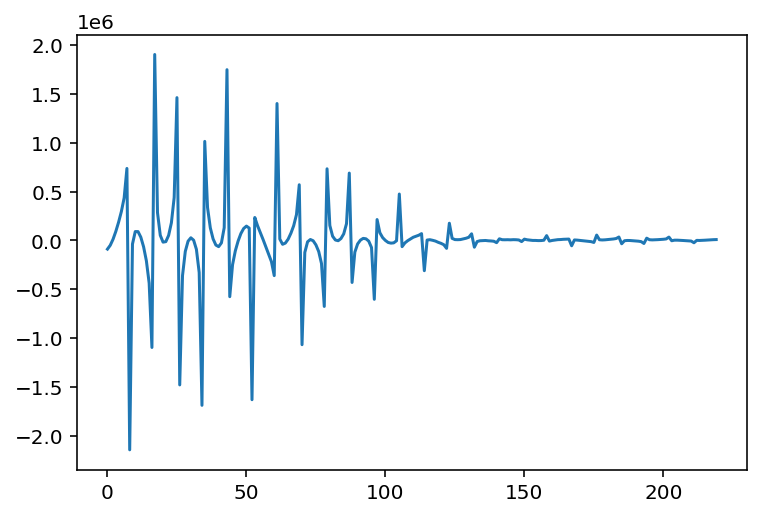

In [212]:
plt.plot(np.real(yf[1:N]))

In [ ]:
np.argmax(np.abs(yf[1:N]))

8

In [ ]:
xf[8]

0.017857142857142856

In [ ]:
a = np.array(range(16)).reshape(4, -1)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
np.sum(a, axis=0)

array([24, 28, 32, 36])

In [269]:
fftfreq??

In [281]:
sig=array([ 2822.30769231,  2822.30769231,  2057.30769231,  2057.30769231,
        2057.30769231,  2057.30769231,  2057.30769231,  2057.30769231,
        2057.30769231,  1292.30769231,  -747.69230769,  -747.69230769,
        -747.69230769,  -747.69230769,  -747.69230769,  -747.69230769,
        -747.69230769, -1512.69230769, -1512.69230769, 26282.30769231,
       49232.30769231, 48467.30769231, 16847.30769231, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, 42347.30769231, 91052.30769231, 91052.30769231,
       44387.30769231, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, 42602.30769231,
       90797.30769231, 90797.30769231, 44642.30769231, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, 42347.30769231, 91052.30769231, 91052.30769231,
       44387.30769231, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, 42602.30769231,
       90797.30769231, 90797.30769231, 44642.30769231, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, 42347.30769231, 91052.30769231, 91052.30769231,
       44387.30769231, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, 42602.30769231,
       90797.30769231, 90797.30769231, 44642.30769231, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, 42347.30769231, 91052.30769231, 91052.30769231,
       44387.30769231, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769, -5592.69230769,
       -5592.69230769, -5592.69230769, -5592.69230769,  3842.30769231,
       32657.30769231, 33422.30769231, 21947.30769231, -4062.69230769,
       -4062.69230769, -4062.69230769, -4062.69230769, -4062.69230769,
       -4062.69230769, -4062.69230769, -4062.69230769, -4062.69230769,
       -3297.69230769, -3297.69230769, -3297.69230769, -3297.69230769,
       -3297.69230769, -3297.69230769, -3297.69230769, -3297.69230769,
       -3297.69230769, -3297.69230769])

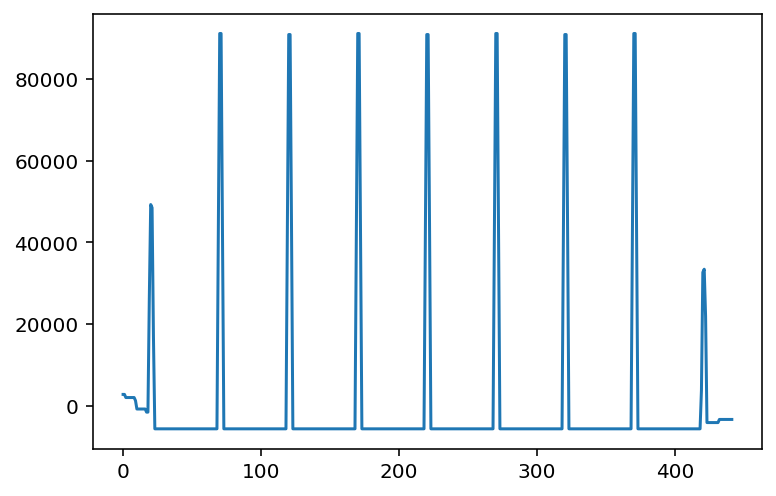

In [282]:
plt.plot(sig)